1. Import required libraries and read the dataset. (2 marks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("D:\\EDA\\PROJECT2\\apps.csv")

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. 

In [3]:
df.head(10)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   
5     167  5.6M      50,000+  Free     0       Everyone   
6     178   19M      50,000+  Free     0       Everyone   
7   36815   29M   1,000,000+  Free     0       Everyone   
8   13791   33M   1,000,000+  Free     0       Everyone   
9     121  3.1M      10,000+  Free     0       Everyone   

                      Genres        Last Updated         Current Ver  \
0               Art & Design     January 7, 2018               1.0.0   
1  Art & Design;Pretend Play    January 15, 2018               2.0.0   
2               Art & Design      August 1, 2018               1.2.4   
3               Art & Design        June 8, 2018  Varies with device   
4    Art & Design;Creativity       June 20, 2018                 1.1   
5               Art & Design      March 26, 2017                 1.0   
6               Art & Design      April 26, 2018                 1.1   
7               Art & Design       June 14, 2018            6.1.61.1   
8               Art & Design  September 20, 2017               2.9.2   
9    Art & Design;Creativity        July 3, 2018                 2.8   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up  
5    2.3 and up  
6  4.0.3 and up  
7    4.2 and up  
8    3.0 and up  
9  4.0.3 and up

In [4]:
df.tail(10)

App             Category  \
10831                       payermonstationnement.fr  MAPS_AND_NAVIGATION   
10832                                       FR Tides              WEATHER   
10833                                    Chemin (fr)  BOOKS_AND_REFERENCE   
10834                                  FR Calculator               FAMILY   
10835                                       FR Forms             BUSINESS   
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10831     NaN      38                9.8M       5,000+  Free     0   
10832     3.8    1195                582k     100,000+  Free     0   
10833     4.8      44                619k       1,000+  Free     0   
10834     4.0       7                2.6M         500+  Free     0   
10835     NaN       0                9.6M          10+  Free     0   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres        Last Updated  \
10831       Everyone  Maps & Navigation       June 13, 2018   
10832       Everyone            Weather   February 16, 2014   
10833       Everyone  Books & Reference      March 23, 2014   
10834       Everyone          Education       June 18, 2017   
10835       Everyone           Business  September 29, 2016   
10836       Everyone          Education       July 25, 2017   
10837       Everyone          Education        July 6, 2018   
10838       Everyone            Medical    January 20, 2017   
10839     Mature 17+  Books & Reference    January 19, 2015   
10840       Everyone          Lifestyle       July 25, 2018   

              Current Ver         Android Ver  
10831           2.0.148.0          4.0 and up  
10832                 6.0          2.1 and up  
10833                 0.8          2.2 and up  
10834               1.0.0          4.1 and up  
10835               1.1.5          4.0 and up  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device

In [5]:
df.shape

(10841, 13)

In [6]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [7]:
df.describe(include = 'all')

App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

         Type  Price Content Rating Genres    Last Updated  \
count   10840  10841          10840  10841           10841   
unique      3     93              6    120            1378   
top      Free      0       Everyone  Tools  August 3, 2018   
freq    10039  10040           8714    842             326   
mean      NaN    NaN            NaN    NaN             NaN   
std       NaN    NaN            NaN    NaN             NaN   
min       NaN    NaN            NaN    NaN             NaN   
25%       NaN    NaN            NaN    NaN             NaN   
50%       NaN    NaN            NaN    NaN             NaN   
75%       NaN    NaN            NaN    NaN             NaN   
max       NaN    NaN            NaN    NaN             NaN   

               Current Ver Android Ver  
count                10833       10838  
unique                2832          33  
top     Varies with device  4.1 and up  
freq                  1459        2451  
mean                   NaN         NaN  
std                    NaN         NaN  
min                    NaN         NaN  
25%                    NaN         NaN  
50%                    NaN         NaN  
75%                    NaN         NaN  
max                    NaN         NaN

4. Check if there are any duplicate records in the dataset? if any drop them. (2 marks)

In [8]:
df[df.duplicated()]

App      Category  Rating  \
229                       Quick PDF Scanner + OCR FREE      BUSINESS     4.2   
236                                                Box      BUSINESS     4.2   
239                                 Google My Business      BUSINESS     4.4   
256                                ZOOM Cloud Meetings      BUSINESS     4.4   
261                          join.me - Simple Meetings      BUSINESS     4.0   
...                                                ...           ...     ...   
8643                    Wunderlist: To-Do List & Tasks  PRODUCTIVITY     4.6   
8654   TickTick: To Do List with Reminder, Day Planner  PRODUCTIVITY     4.6   
8658                           ColorNote Notepad Notes  PRODUCTIVITY     4.6   
10049        Airway Ex - Intubate. Anesthetize. Train.       MEDICAL     4.3   
10768                                             AAFP       MEDICAL     3.8   

       Reviews                Size      Installs  Type Price Content Rating  \
229      80805  Varies with device    5,000,000+  Free     0       Everyone   
236     159872  Varies with device   10,000,000+  Free     0       Everyone   
239      70991  Varies with device    5,000,000+  Free     0       Everyone   
256      31614                 37M   10,000,000+  Free     0       Everyone   
261       6989  Varies with device    1,000,000+  Free     0       Everyone   
...        ...                 ...           ...   ...   ...            ...   
8643    404610  Varies with device   10,000,000+  Free     0       Everyone   
8654     25370  Varies with device    1,000,000+  Free     0       Everyone   
8658   2401017  Varies with device  100,000,000+  Free     0       Everyone   
10049      123                 86M       10,000+  Free     0       Everyone   
10768       63                 24M       10,000+  Free     0       Everyone   

             Genres       Last Updated         Current Ver         Android Ver  
229        Business  February 26, 2018  Varies with device        4.0.3 and up  
236        Business      July 31, 2018  Varies with device  Varies with device  
239        Business      July 24, 2018    2.19.0.204537701          4.4 and up  
256        Business      July 20, 2018      4.1.28165.0716          4.0 and up  
261        Business      July 16, 2018           4.3.0.508          4.4 and up  
...             ...                ...                 ...                 ...  
8643   Productivity      April 6, 2018  Varies with device  Varies with device  
8654   Productivity     August 6, 2018  Varies with device  Varies with device  
8658   Productivity      June 27, 2018  Varies with device  Varies with device  
10049       Medical       June 1, 2018              0.6.88          5.0 and up  
10768       Medical      June 22, 2018               2.3.1          5.0 and up  

[483 rows x 13 columns]

In [9]:
df[df.duplicated()].count()

App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df[df.duplicated()].sum()

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [12]:
df['Category'].nunique()

34

In [13]:
df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [14]:
df.drop(df[df['Category'] == '1.9'].index, axis = 0, inplace = True)

In [15]:
df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low) 

In [16]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10357, dtype: float64

In [17]:
df['Rating'].isna().sum()

1465

In [18]:
df['Rating'] = df['Rating'].dropna()

In [19]:
df.dropna(subset = 'Rating',inplace = True)

In [20]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 8892, dtype: float64

In [21]:
df['Rating_category'] = df['Rating']

In [22]:
df['Rating_category']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating_category, Length: 8892, dtype: float64

In [23]:
df['Rating_category'].value_counts()

4.4    1032
4.3    1016
4.5     977
4.2     888
4.6     768
4.1     657
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating_category, dtype: int64

In [24]:
for i in df['Rating_category']:
    if i > 3.5:
        df['Rating_category'] = df['Rating_category'].replace({i : 'high'})
    else:
        df['Rating_category'] = df['Rating_category'].replace({i : 'low'})

In [25]:
df['Rating_category'].value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

In [26]:
df.head(5)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver Rating_category  
0  4.0.3 and up            high  
1  4.0.3 and up            high  
2  4.0.3 and up            high  
3    4.2 and up            high  
4    4.4 and up            high

In [27]:
df.tail(5)

App             Category  \
10834                                  FR Calculator               FAMILY   
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10834     4.0       7                2.6M         500+  Free     0   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10834       Everyone          Education     June 18, 2017               1.0.0   
10836       Everyone          Education     July 25, 2017                1.48   
10837       Everyone          Education      July 6, 2018                 1.0   
10839     Mature 17+  Books & Reference  January 19, 2015  Varies with device   
10840       Everyone          Lifestyle     July 25, 2018  Varies with device   

              Android Ver Rating_category  
10834          4.1 and up            high  
10836          4.1 and up            high  
10837          4.1 and up            high  
10839  Varies with device            high  
10840  Varies with device            high

 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution. 

<Axes: xlabel='Rating_category', ylabel='count'>

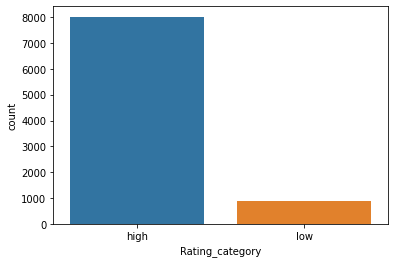

In [28]:
sns.countplot(data = df, x = df['Rating_category'])

THE DISTRIBUTION OF RATING CATEGORY VARIES LIKE THERE IS A COUNT OF 8012 FOR HIGH RATING AND 880 COUNT FOR LOW RATING.

 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [29]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: object

In [30]:
pd.set_option('display.max_row',None)
df['Reviews'] = df['Reviews'].astype('int')

In [31]:
df['Reviews']

0             159
1             967
2           87510
3          215644
4             967
5             167
6             178
7           36815
8           13791
9             121
10          13880
11           8788
12          44829
13           4326
14           1518
15             55
16           3632
17             27
18         194216
19         224399
20            450
21            654
22           7699
24            118
25            192
26          20260
27            203
28            136
29            223
30           1120
31            227
32           5035
33           1015
34            353
35            564
36           8145
37          36639
38            158
39            591
40            117
41            176
42         295221
43           2206
44             26
45         174531
46           1070
47             85
48            845
49            367
50           1598
51            284
52          17057
53            129
54            542
55          10479
56        

<Axes: xlabel='Reviews'>

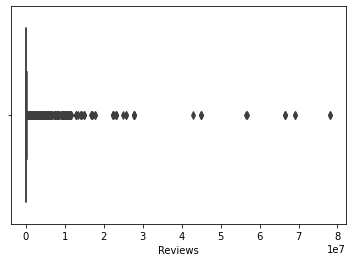

In [32]:
sns.boxplot(data = df, x = df['Reviews'])

In [33]:
df['Reviews'] = np.log(df['Reviews'])

<Axes: xlabel='Reviews'>

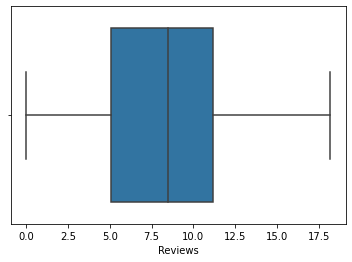

In [34]:
sns.boxplot(data = df, x = df['Reviews'])

9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device') 

In [35]:
type(df['Size'])

pandas.core.series.Series

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   float64
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: float64(2), object(12)
memory usage: 1.0+ MB


In [37]:
df['Size'].value_counts()

Varies with device    1468
14M                    154
13M                    152
12M                    151
11M                    150
15M                    149
17M                    126
25M                    125
21M                    112
16M                    112
24M                    111
19M                    110
20M                    107
26M                    106
23M                     99
18M                     99
10M                     93
22M                     92
27M                     85
28M                     74
37M                     71
33M                     70
30M                     69
35M                     66
31M                     65
29M                     63
3.3M                    62
44M                     56
40M                     55
46M                     54
2.5M                    53
39M                     52
32M                     52
2.8M                    51
36M                     51
3.8M                    51
4.0M                    50
3

In [38]:
df['Size'].isna().sum()

0

In [39]:
df['Size'] = df['Size'].str.replace('M','000000')
df['Size'] = df['Size'].str.replace('k','000')
df['Size'] = df['Size'].str.replace('+','')
df['Size'] = df['Size'].str.replace(',','')

In [40]:
df['Size'].value_counts()

Varies with device    1468
14000000               154
13000000               152
12000000               151
11000000               150
15000000               149
17000000               126
25000000               125
21000000               112
16000000               112
24000000               111
19000000               110
20000000               107
26000000               106
23000000                99
18000000                99
10000000                93
22000000                92
27000000                85
28000000                74
37000000                71
33000000                70
30000000                69
35000000                66
31000000                65
29000000                63
3.3000000               62
44000000                56
40000000                55
46000000                54
2.5000000               53
39000000                52
32000000                52
2.8000000               51
36000000                51
3.8000000               51
4.0000000               50
3

In [41]:
df.drop(df[df['Size'] == 'Varies with device'].index,inplace = True)

In [42]:
df['Size'].value_counts()

14000000      154
13000000      152
12000000      151
11000000      150
15000000      149
17000000      126
25000000      125
16000000      112
21000000      112
24000000      111
19000000      110
20000000      107
26000000      106
23000000       99
18000000       99
10000000       93
22000000       92
27000000       85
28000000       74
37000000       71
33000000       70
30000000       69
35000000       66
31000000       65
29000000       63
3.3000000      62
44000000       56
40000000       55
46000000       54
2.5000000      53
39000000       52
32000000       52
36000000       51
2.8000000      51
3.8000000      51
4.0000000      50
2.3000000      49
38000000       49
3.9000000      49
48000000       49
34000000       49
2.9000000      48
3.0000000      47
3.4000000      45
3.1000000      45
4.3000000      44
5.0000000      44
4.1000000      44
3.7000000      44
3.2000000      43
50000000       43
3.5000000      43
5.4000000      42
4.2000000      42
41000000       42
49000000  

In [43]:
df['Size'] = df['Size'].astype('float')

10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type. 

In [44]:
df['Installs']

0               10,000+
1              500,000+
2            5,000,000+
3           50,000,000+
4              100,000+
5               50,000+
6               50,000+
7            1,000,000+
8            1,000,000+
9               10,000+
10           1,000,000+
11           1,000,000+
12          10,000,000+
13             100,000+
14             100,000+
15               5,000+
16             500,000+
17              10,000+
18           5,000,000+
19          10,000,000+
20             100,000+
21             100,000+
22             500,000+
24              50,000+
25              10,000+
26             500,000+
27             100,000+
28              10,000+
29             100,000+
30             100,000+
31              50,000+
32             100,000+
33             100,000+
34              10,000+
35             100,000+
36             500,000+
38              10,000+
39             500,000+
40              10,000+
41             100,000+
43             100,000+
44              

In [45]:
df['Installs'] = df['Installs'].str.replace("+","")
df['Installs'] = df['Installs'].str.replace(",","")

In [46]:
df['Installs'].isna().sum()

0

In [47]:
df['Installs'] = df['Installs'].astype('int')

11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [48]:
df['Price'].value_counts()

0          6877
$0.99       104
$2.99        98
$4.99        61
$1.99        53
$3.99        42
$1.49        28
$2.49        16
$9.99        14
$5.99        12
$399.99      11
$6.99         9
$14.99        8
$4.49         8
$7.99         7
$3.49         6
$19.99        4
$29.99        4
$24.99        3
$12.99        3
$1.00         2
$1.70         2
$8.99         2
$17.99        2
$10.99        2
$16.99        2
$11.99        2
$10.00        2
$1.50         1
$3.04         1
$1.75         1
$14.00        1
$2.00         1
$3.08         1
$2.59         1
$19.40        1
$15.46        1
$5.49         1
$4.29         1
$13.99        1
$389.99       1
$3.28         1
$4.60         1
$9.00         1
$2.90         1
$1.97         1
$2.56         1
$8.49         1
$37.99        1
$18.99        1
$1.76         1
$33.99        1
$39.99        1
$7.49         1
$79.99        1
$3.88         1
$400.00       1
$3.02         1
$4.84         1
$15.99        1
$4.77         1
$1.61         1
$1.59   

In [49]:
df['Price'] = df['Price'].str.replace("$","")

In [50]:
df['Price'] = df['Price'].astype('float')

12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis) (2 marks) 

In [51]:
df.drop(['Rating','App','Genres','Last Updated','Current Ver','Android Ver'], axis = 1, inplace = True)

In [52]:
df.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   float64
 3   Installs         7424 non-null   int32  
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(3), int32(1), object(4)
memory usage: 493.0+ KB


In [54]:
df['Size'] = df['Size'].astype('float')

In [55]:
df['Content Rating']

0               Everyone
1               Everyone
2               Everyone
3                   Teen
4               Everyone
5               Everyone
6               Everyone
7               Everyone
8               Everyone
9               Everyone
10              Everyone
11              Everyone
12                  Teen
13              Everyone
14              Everyone
15              Everyone
16              Everyone
17              Everyone
18              Everyone
19              Everyone
20              Everyone
21              Everyone
22          Everyone 10+
24              Everyone
25              Everyone
26              Everyone
27              Everyone
28              Everyone
29              Everyone
30              Everyone
31              Everyone
32              Everyone
33              Everyone
34                  Teen
35              Everyone
36              Everyone
38              Everyone
39              Everyone
40              Everyone
41              Everyone


In [56]:
df['Type']

0        Free
1        Free
2        Free
3        Free
4        Free
5        Free
6        Free
7        Free
8        Free
9        Free
10       Free
11       Free
12       Free
13       Free
14       Free
15       Free
16       Free
17       Free
18       Free
19       Free
20       Free
21       Free
22       Free
24       Free
25       Free
26       Free
27       Free
28       Free
29       Free
30       Free
31       Free
32       Free
33       Free
34       Free
35       Free
36       Free
38       Free
39       Free
40       Free
41       Free
43       Free
44       Free
45       Free
46       Free
47       Free
48       Free
49       Free
50       Free
51       Free
53       Free
54       Free
55       Free
56       Free
57       Free
58       Free
59       Free
60       Free
61       Free
62       Free
63       Free
64       Free
65       Free
66       Free
69       Free
70       Free
71       Free
72       Free
74       Free
75       Free
76       Free
77       Free
78    

In [57]:
df['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
5             ART_AND_DESIGN
6             ART_AND_DESIGN
7             ART_AND_DESIGN
8             ART_AND_DESIGN
9             ART_AND_DESIGN
10            ART_AND_DESIGN
11            ART_AND_DESIGN
12            ART_AND_DESIGN
13            ART_AND_DESIGN
14            ART_AND_DESIGN
15            ART_AND_DESIGN
16            ART_AND_DESIGN
17            ART_AND_DESIGN
18            ART_AND_DESIGN
19            ART_AND_DESIGN
20            ART_AND_DESIGN
21            ART_AND_DESIGN
22            ART_AND_DESIGN
24            ART_AND_DESIGN
25            ART_AND_DESIGN
26            ART_AND_DESIGN
27            ART_AND_DESIGN
28            ART_AND_DESIGN
29            ART_AND_DESIGN
30            ART_AND_DESIGN
31            ART_AND_DESIGN
32            ART_AND_DESIGN
33            ART_AND_DESIGN
34            ART_AND_DESIGN
35            

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   object 
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   float64
 3   Installs         7424 non-null   int32  
 4   Type             7424 non-null   object 
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   object 
 7   Rating_category  7424 non-null   object 
dtypes: float64(3), int32(1), object(4)
memory usage: 493.0+ KB


13. Encode the categorical columns. 

In [59]:
le = LabelEncoder()

In [60]:
for col in df[['Category','Type','Content Rating','Rating_category']]:
        df[col] = le.fit_transform(df[col])

In [61]:
df.head(5)

Category    Reviews        Size  Installs  Type  Price  Content Rating  \
0         0   5.068904  19000000.0     10000     0    0.0               1   
1         0   6.874198  14000000.0    500000     0    0.0               1   
2         0  11.379508         8.7   5000000     0    0.0               1   
3         0  12.281384  25000000.0  50000000     0    0.0               4   
4         0   6.874198         2.8    100000     0    0.0               1   

   Rating_category  
0                0  
1                0  
2                0  
3                0  
4                0

14. Segregate the target and independent features (Hint: Use Rating_category as the target) (2 marks) 

In [62]:
x = df.drop('Rating_category',axis = 1)
y = df['Rating_category']


15. Split the dataset into train and test. (2 marks) 

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state =1)

16. Standardize the data, so that the values are within a particular range

In [64]:
sc = StandardScaler()

In [65]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)